In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
from tensorflow import keras
from keras.datasets import reuters

In [4]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [10]:
X_train.shape, y_test.shape

((8982,), (2246,))

In [7]:
len(X_train[0]), len(X_train[1])

(87, 56)

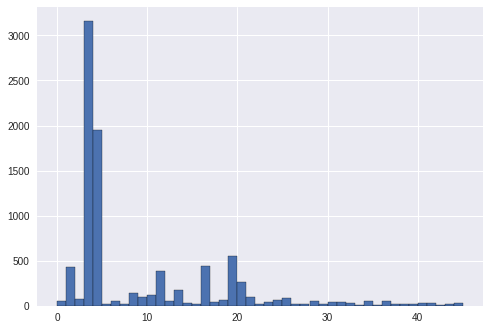

In [20]:
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use("seaborn")

# there are 45 different classes
plt.hist(y_train, bins=45, edgecolor="k")
plt.show()

In [24]:
word_index = reuters.get_word_index()
inverse_word_index = dict([value, key] for key, value in word_index.items())

def decode_text(text, mapping):
  return " ".join([mapping.get(w - 3, "?") for w in text])

decode_text(X_train[0], inverse_word_index)

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences), dimension))
  
  for i, sequence in enumerate(sequences):
    result[i, sequence] = 1
  return result

In [0]:
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

In [31]:
X_train[0], len(X_train[0])

(array([0., 1., 1., ..., 0., 0., 0.]), 10000)

In [0]:
def to_one_hot(labels, dimension=46):
  result = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    result[i, label] = 1
  return result

one_hot_train_labels = to_one_hot(y_train)
one_hot_test_labels = to_one_hot(y_test)

In [34]:
one_hot_train_labels.shape

(8982, 46)

In [0]:
# this is the same as the custom code in the previous cell
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)

In [0]:
model = keras.Sequential([
                          keras.layers.Dense(64, activation="relu", input_shape=(10000,)),
                          keras.layers.Dense(64, activation="relu"),
                          keras.layers.Dense(46, activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [0]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [43]:
history = model.fit(partial_X_train, partial_y_train, epochs=20,
                    batch_size=512, 
                    validation_data=(X_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 263us/sample - loss: 2.7257 - accuracy: 0.5199 - val_loss: 1.7854 - val_accuracy: 0.6350
Epoch 2/20
7982/7982 [==============================] - 1s 134us/sample - loss: 1.4378 - accuracy: 0.7063 - val_loss: 1.3294 - val_accuracy: 0.7100
Epoch 3/20
7982/7982 [==============================] - 1s 133us/sample - loss: 1.0525 - accuracy: 0.7785 - val_loss: 1.1361 - val_accuracy: 0.7760
Epoch 4/20
7982/7982 [==============================] - 1s 128us/sample - loss: 0.8261 - accuracy: 0.8326 - val_loss: 1.0214 - val_accuracy: 0.7930
Epoch 5/20
7982/7982 [==============================] - 1s 130us/sample - loss: 0.6609 - accuracy: 0.8646 - val_loss: 0.9598 - val_accuracy: 0.8010
Epoch 6/20
7982/7982 [==============================] - 1s 133us/sample - loss: 0.5373 - accuracy: 0.8861 - val_loss: 0.9231 - val_accuracy: 0.8130
Epoch 7/20
7982/7982 [==============================] - 1s 125us

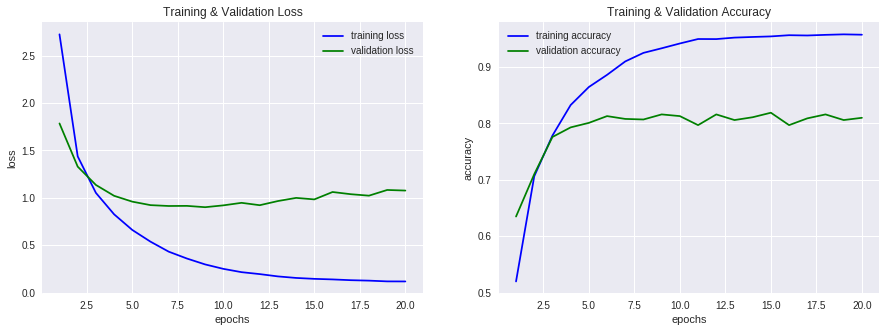

In [53]:
history_dict = history.history
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

epochs = range(1, len(loss) + 1)

fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)

ax[0].plot(epochs, loss, "b", label="training loss")
ax[0].plot(epochs, val_loss, "g", label="validation loss")
ax[0].set(title="Training & Validation Loss", xlabel="epochs", ylabel="loss")
ax[0].legend()

ax[1].plot(epochs, acc, "b", label="training accuracy")
ax[1].plot(epochs, val_acc, "g", label="validation accuracy")
ax[1].set(title="Training & Validation Accuracy", xlabel="epochs", ylabel="accuracy")
ax[1].legend()

plt.show()

In [46]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])